<a href="https://colab.research.google.com/github/adihebbalae/randos/blob/main/Sentiment_Classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd   # Great for tables (google spreadsheets, microsoft excel, csv).
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import spacy
import wordcloud
import os # Good for navigating your computer's files
import sys
pd.options.mode.chained_assignment = None #suppress warnings

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from spacy.lang.en.stop_words import STOP_WORDS
nltk.download('wordnet')
nltk.download('punkt')

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!python -m spacy download en_core_web_md
import en_core_web_md
text_to_nlp = spacy.load('en_core_web_md')



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 11.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
#import data
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%203%20-%20NLP/yelp_final.csv"


yelp_final.csv      100%[===================>] 743.14K  --.-KB/s    in 0.007s  


In [ ]:
#read data
yelp_full = pd.read_csv('yelp_final.csv')
yelp_full.head()

,business_id,stars,text,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,5,My wife took me here on my birthday for breakf...,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,5,I have no idea why some people give bad review...,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,_1QQZuf4zZOyFCvXc0o6Vg,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",uZetl9T0NcROGOyFfughhg,1,2,0
3,6ozycU1RpktNG2-1BroVtw,5,General Manager Scott Petello is a good egg!!!...,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
4,zp713qNhx8d9KCJJnrw1xA,5,Drop what you're doing and drive here. After I...,wFweIWhv2fREZV_dYkz_1g,7,7,4


In [ ]:
needed_columns = ['stars','text']
yelp = yelp_full[needed_columns]
yelp.head()

,stars,text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
2,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
3,5,General Manager Scott Petello is a good egg!!!...
4,5,Drop what you're doing and drive here. After I...


In [ ]:

num_stars =  1
for t in yelp[yelp['stars'] == num_stars]['text'].head(20).values:
    print (t)

U can go there n check the car out. If u wanna buy 1 there? That's wrong move! If u even want a car service from there? U made a biggest mistake of ur life!! I had 1 time asked my girlfriend to take my car there for an oil service, guess what? They ripped my girlfriend off by lying how bad my car is now. If without fixing the problem. Might bring some serious accident. Then she did what they said. 4 brand new tires, timing belt, 4 new brake pads. U know why's the worst? All of those above I had just changed 2 months before!!! What a trashy dealer is that? People, better off go somewhere!
Disgusting!  Had a Groupon so my daughter and I tried it out.  Very outdated and gaudy 80's style interior made me feel like I was in an episode of Sopranos.  The food itself was pretty bad.  We ordered pretty simple dishes but they just had no flavor at all!  After trying it out I'm positive all the good reviews on here are employees or owners creating them.
I've eaten here many times, but none as bad

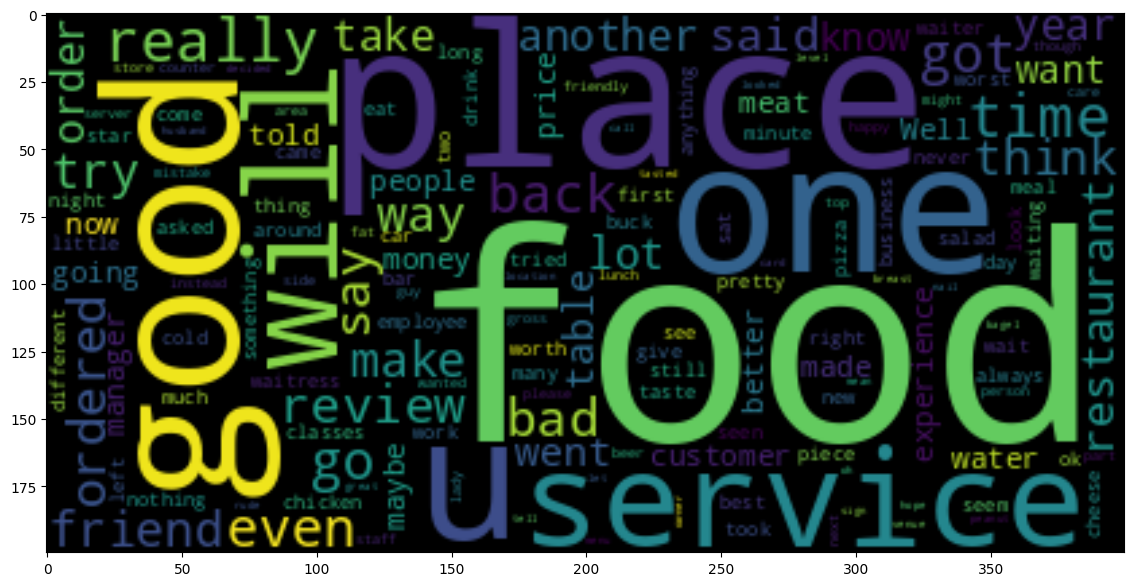

In [ ]:
num_stars =  1
this_star_text = ''
for t in yelp[yelp['stars'] == num_stars]['text'].values: # form field cell
    this_star_text += t + ' '

wordcloud = WordCloud()
wordcloud.generate_from_text(this_star_text)
plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')

In [ ]:
def is_good_review(num_stars):
    if num_stars > 3: ### YOUR CODE HERE
        return True
    else:
        return False

yelp['is_good_review'] = yelp['stars'].apply(is_good_review)
yelp.head()

,stars,text,is_good_review
0,5,My wife took me here on my birthday for breakf...,True
1,5,I have no idea why some people give bad review...,True
2,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",True
3,5,General Manager Scott Petello is a good egg!!!...,True
4,5,Drop what you're doing and drive here. After I...,True


In [ ]:
import nltk
nltk.download('punkt_tab')

temp = "All the people I spoke to were super nice and very welcoming." #@param {type:"string"}
tokens = word_tokenize(temp)
tokens

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['All',
 'the',
 'people',
 'I',
 'spoke',
 'to',
 'were',
 'super',
 'nice',
 'and',
 'very',
 'welcoming',
 '.']

In [ ]:
example_word = "fifteen"
if example_word.lower() in STOP_WORDS:
  print ('"' + example_word + '" is a stop word.')
else:
  print ('"' + example_word + '" is NOT a stop word.')

"fifteen" is a stop word.


In [ ]:
X_text = yelp['text']
y = yelp['is_good_review']

In [ ]:
def tokenize(text):
    clean_tokens = []
    for token in text_to_nlp(text):
        if (not token.is_stop) & (token.lemma_ != '-PRON-') & (not token.is_punct): # -PRON- is a special all inclusive "lemma" spaCy uses for any pronoun, we want to exclude these
            clean_tokens.append(token.lemma_)
    return clean_tokens


In [ ]:
bow_transformer = CountVectorizer(analyzer=tokenize, max_features=800).fit(X_text)

In [ ]:
bow_transformer.vocabulary_

{'wife': 781,
 'take': 702,
 'birthday': 103,
 'breakfast': 119,
 'excellent': 266,
 ' ': 2,
 'perfect': 526,
 'sit': 643,
 'outside': 508,
 'waitress': 763,
 'food': 304,
 'arrive': 69,
 'quickly': 568,
 'busy': 130,
 'Saturday': 44,
 'morning': 469,
 'look': 424,
 'like': 412,
 'place': 537,
 'fill': 292,
 'pretty': 555,
 'early': 248,
 'well': 778,
 '\n\n': 1,
 'simply': 641,
 'good': 330,
 'sure': 696,
 'use': 746,
 'ingredient': 384,
 'fresh': 310,
 'order': 505,
 'amazing': 64,
 'menu': 456,
 'white': 779,
 'egg': 252,
 'vegetable': 752,
 'tasty': 705,
 'delicious': 224,
 'come': 175,
 '2': 14,
 'piece': 535,
 'bread': 117,
 'absolutely': 55,
 'meal': 449,
 'toast': 720,
 'wait': 761,
 'idea': 378,
 'people': 524,
 'bad': 84,
 'review': 593,
 'go': 329,
 'probably': 558,
 'case': 141,
 'friend': 313,
 'pm': 544,
 'past': 519,
 'Sunday': 47,
 'think': 714,
 'evening': 263,
 'seat': 616,
 'say': 611,
 'girl': 325,
 'waiter': 762,
 'get': 323,
 'drink': 244,
 'pleasant': 541,
 'serv

The number represents the **index** (alphabetical position) of a word in the vocabulary.

By the way, how many words do we have?


In [ ]:
len(bow_transformer.vocabulary_)

800

In [ ]:
X = bow_transformer.transform(X_text)

In [ ]:
pd.DataFrame(X.toarray())

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,0,3,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
996,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,11,0,0,0,0,0,1,0,0,...,2,0,1,0,1,0,1,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print (accuracy)

0.74


In [ ]:
example_review = "This restaurant sucks"
prediction = logistic_model.predict(bow_transformer.transform([example_review]))

if prediction:
  print ("This was a GOOD review!")
else:
  print ("This was a BAD review!")



This was a GOOD review!


In [ ]:
def get_word_weight(word,model,vocab_dict):


  if word in vocab_dict:

    index=vocab_dict[word]
    weight=model.coef_[0][index]

    return weight
  else:
    return "That word is not in our Vocabulary!"


In [ ]:
sentence = "this is a bad place"
words=tokenize(sentence)
temp_weight_dict={}
for word in words:
  weight=get_word_weight(word,logistic_model,bow_transformer.vocabulary_)
  temp_weight_dict[word]=weight
print(temp_weight_dict,"bias:  "+str(logistic_model.intercept_[0]))


{'bad': -0.5140359011903901, 'place': -0.37932229976679227} bias:  0.5276573752601724


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()

In [ ]:
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print ("The accuracy of the model is " + str(accuracy*100) + "%")

The accuracy of the model is 74.0%


In [ ]:
text_to_nlp = en_core_web_md.load() #Prepare Spacy

In [ ]:
doc = text_to_nlp("I like apples and cherries and peaches and pie")
token = doc[2] #Try changing this!
print (token)
print (len(token))

apples
6


In [ ]:
print ('Vector for: ', token)
print (token.vector)

Vector for:  apples
[-2.3691   -3.3093   -2.3683    3.9687    0.7657   -2.4125   -2.6989
  2.191    -5.2731    1.4548    4.0483   -1.3258   -2.5053    1.8406
  1.456    -1.8792    2.7844   -3.4126    0.47314  -5.9216   -0.40092
  2.6631   -2.8213   -1.6466   -2.3342   -1.857    -2.5771    1.5269
  0.2391   -1.2999    1.267    -1.5071    0.50731  -2.9986    0.96218
 -1.2704    2.9455    0.61234   2.1324   -0.92046   1.439     0.42566
  1.5614    2.0232   -1.1418    1.4407    0.28988  -0.67582   2.2102
 -1.5918    0.069704  0.6616    1.8213   -2.7202   -2.2525    0.44366
 -2.3768    1.4561    5.1407   -1.5928    2.8267    0.84684   2.8155
  0.6176   -0.47365   0.14659  -2.8028   -3.6587    0.56587  -0.95888
  0.031699  2.5489    0.23451   0.025016  2.1471    1.6193   -6.8539
 -1.9494    4.5936   -0.41406  -1.1074    1.0288    0.55435  -0.59505
  2.0455    1.2122   -0.086148  0.45522  -0.038163 -0.071074  2.2994
  2.6239    3.1491   -4.3686   -1.5754    0.4051    4.4168   -3.227
 -2.0252 

In [ ]:
doc = text_to_nlp(u"guitar and piano")
word1 = doc[0]
word2 = doc[2]
word1.similarity(word2)


0.7529729604721069

In [ ]:
def tokenize_vecs(text):
    clean_tokens = []
    for token in text_to_nlp(text):
        if (not token.is_stop) & (token.lemma_ != '-PRON-') & (not token.is_punct):
          # -PRON- is a special all inclusive "lemma" spaCy uses for any pronoun, we want to exclude these
            clean_tokens.append(token)
    return clean_tokens

In [ ]:
X_word2vec = []
for text in X_text:
  review = tokenize_vecs(text) # returns cleaned list of spacy tokens
  review_vec = [0]*300
  for word in review:
    review_vec += word.vector
  review_vec = review_vec / len(review)
  X_word2vec.append(review_vec)

X_word2vec = np.array(X_word2vec)


In [ ]:
#import new logistic regression model
w2v_model = LogisticRegression(max_iter = 1000)

#train-test split
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(X_word2vec, y, test_size=0.2, random_state=101)

w2v_model.fit(X_train_word2vec, y_train_word2vec)

w2v_preds = w2v_model.predict(X_test_word2vec)
accuracy = accuracy_score(y_test_word2vec, w2v_preds)
print (accuracy)

0.755


In [ ]:
vocab_dict = dict() #initialize dictionary

for word in bow_transformer.vocabulary_:
    vocab_dict[word] = text_to_nlp(word).vector

for word, vec in vocab_dict.items(): # Iterating through the dictionary to print each key and value
  print ('Word: {}. Vector length: {}'.format(word, len(vec)))

print()
#print ('{} words in our dictionary'.format(len(vocab_dict)))

Word: wife. Vector length: 300
Word: take. Vector length: 300
Word: birthday. Vector length: 300
Word: breakfast. Vector length: 300
Word: excellent. Vector length: 300
Word:  . Vector length: 300
Word: perfect. Vector length: 300
Word: sit. Vector length: 300
Word: outside. Vector length: 300
Word: waitress. Vector length: 300
Word: food. Vector length: 300
Word: arrive. Vector length: 300
Word: quickly. Vector length: 300
Word: busy. Vector length: 300
Word: Saturday. Vector length: 300
Word: morning. Vector length: 300
Word: look. Vector length: 300
Word: like. Vector length: 300
Word: place. Vector length: 300
Word: fill. Vector length: 300
Word: pretty. Vector length: 300
Word: early. Vector length: 300
Word: well. Vector length: 300
Word: 

. Vector length: 300
Word: simply. Vector length: 300
Word: good. Vector length: 300
Word: sure. Vector length: 300
Word: use. Vector length: 300
Word: ingredient. Vector length: 300
Word: fresh. Vector length: 300
Word: order. Vector length: 

In [ ]:
v0 = [2,3,1]
v1 = [2,4,1]

In [ ]:
def vector_cosine_similarity(vec1,vec2):
  #Assume vec1 and vec2 have the same size
  numerator = 0
  for i in range(len(vec1)):
    numerator += vec1[i]*vec2[i]
  mag1 = (sum(elem**2 for elem in vec1))**0.5
  mag2 = (sum(elem**2 for elem in vec2))**0.5
  similarity = numerator/(mag1*mag2)
  return similarity

print(vector_cosine_similarity(v0,v1))

0.9914601339836675


In [ ]:
def word_similarity(word1, word2):
  #Should return a similarity between -1 and 1

  try:
    vec1 = vocab_dict[word1]
    vec2 = vocab_dict[word2]
    return vector_cosine_similarity(vec1,vec2)

  except KeyError:
    print ('Word not in dictionary')

print(word_similarity('burger','steak'))

0.7387349091587005


In [ ]:
def find_nearest_neighbor(word):
  try:
    vec = vocab_dict[word]
    find_most_similar(vec)
  except KeyError:
    print ('Word not in dictionary')

def find_most_similar(start_vec):
  #Should print the top 5 most similar words to start_vec, and their similarities.,
  #Hint: use a for loop to iterate through vocab_dict.
  #Consider using a Pandas series.

  #YOUR CODE HERE
  similarity_series = pd.Series(np.nan, index = vocab_dict.keys())
  for word, vec in vocab_dict.items():
    similarity_series[word] = vector_cosine_similarity(start_vec, vec)
  similarity_series = similarity_series[similarity_series.notna()] #get rid of N/A
  five_most_similar = similarity_series.sort_values().tail()
  print (five_most_similar) #words and similarities

find_nearest_neighbor('bagel')

<ipython-input-37-7959ee874be2>:8: RuntimeWarning: invalid value encountered in scalar divide
  similarity = numerator/(mag1*mag2)


burger      0.790093
sandwich    1.000000
burrito     1.000000
bagel       1.000000
pickle      1.000000
dtype: float64


In [ ]:
def find_analogy(word_a1, word_a2, word_b1):
  #Convert the words to vectors a1, a2, b1
  #If word_a1:word_a2 as word_b1:word_b2, then
  #a1 - a2 = b1 - b2
  #So b2 = ...
  #Calculate b2, and use your previous functions to find the best candidates for word_b2.

  #YOUR CODE HERE
  a1_vec = vocab_dict[word_a1]
  a2_vec = vocab_dict[word_a2]
  b1_vec = vocab_dict[word_b1]
  find_most_similar(b1_vec - a1_vec + a2_vec)

find_analogy('breakfast','bagel','lunch')

<ipython-input-37-7959ee874be2>:8: RuntimeWarning: invalid value encountered in scalar divide
  similarity = numerator/(mag1*mag2)


burrito     0.782805
sandwich    0.782805
pickle      0.782805
bagel       0.782805
lunch       0.815342
dtype: float64


Word arithmetic doesn't always work perfectly - it's pretty tricky to find good examples! Which can you discover?

If you're looking for a way to expand further on this exercise, you can try seeing what happens when you use [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance), another common measurement, instead of cosine similarity.